In [5]:
# this script create the real volcano plots for DE analysis between human and mouse in the hagai system in dsRNA
# in the stimulateddsRNA condition and the control one 

# also generate barplots for gene expression pattern
# and illustrated volcano for explaining the method


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


#this script takes some edgeR table results and analize the expressed genes, try to understad which genes are differentialy expressed among the samples. 
#the analysis based on q_val
import sys
!{sys.executable} -m pip install sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
import math
import os

In [10]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [11]:
print(list(sns.color_palette('BuPu_r',n_colors=3)))
sns.color_palette('BuPu_r',n_colors=3)
pal = sns.color_palette('BuPu_r',n_colors=3)
print(pal.as_hex())



stim_high_col='#88419d'
stim_other_col='#8c97c6'
stim_low_col='#c0d4e6'


print(list(sns.color_palette('GnBu_r',n_colors=3)))
sns.color_palette('GnBu_r',n_colors=3)
pal = sns.color_palette('GnBu_r',n_colors=3)
print(pal.as_hex())


unst_high_col='#2b8cbe'
unst_other_col='#7cccc4'
unst_low_col='#ccebc6'


[(0.5334563629373318, 0.2561937716262976, 0.6163014225297963), (0.5501268742791234, 0.5905728565936179, 0.7777008842752787), (0.7520645905420992, 0.829757785467128, 0.9032525951557093)]
['#88419d', '#8c97c6', '#c0d4e6']
[(0.1697039600153787, 0.5502191464821223, 0.7457439446366783), (0.485121107266436, 0.801045751633987, 0.7677047289504038), (0.8018454440599769, 0.9223068050749711, 0.7745790080738177)]
['#2b8cbe', '#7cccc4', '#ccebc6']


In [12]:
human_mouse_ortho=pd.read_csv(r'input\1-1_human_mouse_metadata.csv',index_col=0)
human_mouse_ortho_1_1=human_mouse_ortho[human_mouse_ortho['Mouse homology type']=='ortholog_one2one']
human_mouse_ortho_1_1


,Gene name human,Mouse gene stable ID,Mouse homology type,%id. target Mouse gene identical to query gene,%id. query gene identical to target Mouse gene,dN with Mouse,dS with Mouse,dnds,p_identity,HUMAN_PPODv4_Jaccard_dollo_age-depth,...,mouse_prom2000500_H3K27ac_UNSTpeaks_intersect_03,mouse_prom2000500_H3K27ac_PIC4peaks_intersect_05,mouse_prom2000500_H3K27ac_UNSTpeaks_intersect_05,mouse_prom2000500_H3K4me3_PIC4peaks_intersect_00,mouse_prom2000500_H3K4me3_UNSTpeaks_intersect_00,mouse_prom2000500_H3K4me3_PIC4peaks_intersect_03,mouse_prom2000500_H3K4me3_UNSTpeaks_intersect_03,mouse_prom2000500_H3K4me3_PIC4peaks_intersect_05,mouse_prom2000500_H3K4me3_UNSTpeaks_intersect_05,p-value_gain_and_loss
ENSG00000198888,MT-ND1,ENSMUSG00000064341,ortholog_one2one,77.0440,77.0440,NaN,NaN,NaN,77.04400,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
ENSG00000198763,MT-ND2,ENSMUSG00000064345,ortholog_one2one,57.0605,57.3913,NaN,NaN,NaN,57.22590,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
ENSG00000198804,MT-CO1,ENSMUSG00000064351,ortholog_one2one,90.8382,90.6615,NaN,NaN,NaN,90.74985,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
ENSG00000198712,MT-CO2,ENSMUSG00000064354,ortholog_one2one,71.3656,71.3656,NaN,NaN,NaN,71.36560,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
ENSG00000228253,MT-ATP8,ENSMUSG00000064356,ortholog_one2one,45.5882,46.2687,0.4871,0.8480,0.574410,45.92845,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000125740,FOSB,ENSMUSG00000003545,ortholog_one2one,95.8580,95.8580,0.0211,0.3819,0.055250,95.85800,4.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.796
ENSG00000139648,KRT71,ENSMUSG00000051879,ortholog_one2one,91.2046,91.0305,0.0425,0.6850,0.062044,91.11755,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010
ENSG00000185614,INKA1,ENSMUSG00000042106,ortholog_one2one,79.0941,80.4965,0.1151,0.4406,0.261235,79.79530,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997
ENSG00000198400,NTRK1,ENSMUSG00000028072,ortholog_one2one,86.1809,85.8573,0.0769,0.6452,0.119188,86.01910,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989


In [13]:
human_mouse_ortho_1_1_dict=dict(zip(human_mouse_ortho_1_1['Mouse gene stable ID'],human_mouse_ortho_1_1.index))

In [14]:
# define volcano data 

In [15]:

study='Hagai'
species=['homo','mus']
if species==['homo','mus']:
    species_full_names=['Homo sapiens','Mus musculus']
    
    
if study=='Hagai':
    treats=['LF4','PIC4']
    stim_FC_col_name=f'logFC_{treats[1]}'
    stim_qval_col_name=f'minuslog_Q_val_col_{treats[1]}'
    unst_FC_col_name=f'logFC_{treats[0]}'
    unst_qval_col_name=f'minuslog_Q_val_col_{treats[0]}'
    
    

df_groups=pd.read_csv(r'input\{}_{}_vs_{}_{}_and_{}_groups_results.csv'.format(study,species[0],species[1],treats[0],treats[1]),index_col=0)
df_groups

,logFC_LF4,minuslog_Q_val_col_LF4,group_LF4,group_PIC4,logFC_PIC4,minuslog_Q_val_col_PIC4
ENSG00000259417,15.441913,295.855509,---,---,13.848277,282.853586
ENSG00000034510,-11.932035,295.855509,---,---,-11.416728,256.804062
ENSG00000162692,12.350022,295.855509,---,---,8.956055,37.662805
ENSG00000073737,13.496145,295.855509,---,---,12.203358,260.385220
ENSG00000166426,14.263694,295.855509,---,---,14.281898,301.829724
...,...,...,...,...,...,...
ENSG00000204060,-0.310880,-0.000000,---,---,-0.776482,0.151160
ENSG00000144230,-0.008400,-0.000000,---,---,1.800975,0.134591
ENSG00000168329,-0.475567,-0.000000,---,---,1.533496,0.533617
ENSG00000170128,0.000000,-0.000000,---,---,1.120675,0.322216


In [16]:
df_groups['unst_color']='black'
df_groups['stim_color']='black'

df_groups['unst_groups_color']='black'
df_groups['stim_groups_color']='black'


df_groups['unst_groups_size']=10
df_groups['stim_groups_size']=10


In [17]:
df_groups.unst_color[(df_groups['logFC_LF4']<=-1) & (df_groups['minuslog_Q_val_col_LF4']>=3)]=unst_low_col
df_groups.unst_color[(df_groups['logFC_LF4']>=1) & (df_groups['minuslog_Q_val_col_LF4']>=3)]=unst_high_col

df_groups.stim_color[(df_groups['logFC_PIC4']<=-1) & (df_groups['minuslog_Q_val_col_PIC4']>=3)]=stim_low_col
df_groups.stim_color[(df_groups['logFC_PIC4']>=1) & (df_groups['minuslog_Q_val_col_PIC4']>=3)]=stim_high_col

print('stim high')
print(len(df_groups[df_groups['stim_color']==stim_high_col]))
print('stim low')
print(len(df_groups[df_groups['stim_color']==stim_low_col]))
print('unst high')
print(len(df_groups[df_groups['unst_color']==unst_high_col]))
print(' unst low')
print(len(df_groups[df_groups['unst_color']==unst_low_col]))





df_groups


stim high
2918
stim low
2720
unst high
2837
 unst low
2677


<ipython-input-17-2c779dcf8210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.unst_color[(df_groups['logFC_LF4']<=-1) & (df_groups['minuslog_Q_val_col_LF4']>=3)]=unst_low_col
<ipython-input-17-2c779dcf8210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.unst_color[(df_groups['logFC_LF4']>=1) & (df_groups['minuslog_Q_val_col_LF4']>=3)]=unst_high_col
<ipython-input-17-2c779dcf8210>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,logFC_LF4,minuslog_Q_val_col_LF4,group_LF4,group_PIC4,logFC_PIC4,minuslog_Q_val_col_PIC4,unst_color,stim_color,unst_groups_color,stim_groups_color,unst_groups_size,stim_groups_size
ENSG00000259417,15.441913,295.855509,---,---,13.848277,282.853586,#2b8cbe,#88419d,black,black,10,10
ENSG00000034510,-11.932035,295.855509,---,---,-11.416728,256.804062,#ccebc6,#c0d4e6,black,black,10,10
ENSG00000162692,12.350022,295.855509,---,---,8.956055,37.662805,#2b8cbe,#88419d,black,black,10,10
ENSG00000073737,13.496145,295.855509,---,---,12.203358,260.385220,#2b8cbe,#88419d,black,black,10,10
ENSG00000166426,14.263694,295.855509,---,---,14.281898,301.829724,#2b8cbe,#88419d,black,black,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000204060,-0.310880,-0.000000,---,---,-0.776482,0.151160,black,black,black,black,10,10
ENSG00000144230,-0.008400,-0.000000,---,---,1.800975,0.134591,black,black,black,black,10,10
ENSG00000168329,-0.475567,-0.000000,---,---,1.533496,0.533617,black,black,black,black,10,10
ENSG00000170128,0.000000,-0.000000,---,---,1.120675,0.322216,black,black,black,black,10,10


In [18]:
df_groups.unst_groups_color[df_groups['group_LF4'].str.startswith('LF4_high')]=unst_high_col
df_groups.unst_groups_color[df_groups['group_LF4'].str.startswith('LF4_low')]=unst_low_col

df_groups.stim_groups_color[df_groups['group_PIC4'].str.startswith('PIC4_high')]=stim_high_col
df_groups.stim_groups_color[df_groups['group_PIC4'].str.startswith('PIC4_low')]=stim_low_col


df_groups.unst_groups_size[df_groups['group_LF4'].str.startswith('LF4_high')]=16
df_groups.unst_groups_size[df_groups['group_LF4'].str.startswith('LF4_low')]=16

df_groups.stim_groups_size[df_groups['group_PIC4'].str.startswith('PIC4_high')]=16
df_groups.stim_groups_size[df_groups['group_PIC4'].str.startswith('PIC4_low')]=16


print('stim high')
print(len(df_groups[df_groups['stim_groups_color']==stim_high_col]))
print('stim low')
print(len(df_groups[df_groups['stim_groups_color']==stim_low_col]))
print('unst high')
print(len(df_groups[df_groups['unst_groups_color']==unst_high_col]))
print(' unst low')
print(len(df_groups[df_groups['unst_groups_color']==unst_low_col]))



stim high
579
stim low
519
unst high
498
 unst low
476


<ipython-input-18-8ab9ecd05c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.unst_groups_color[df_groups['group_LF4'].str.startswith('LF4_high')]=unst_high_col
<ipython-input-18-8ab9ecd05c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.unst_groups_color[df_groups['group_LF4'].str.startswith('LF4_low')]=unst_low_col
<ipython-input-18-8ab9ecd05c18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.st

In [20]:
### just check i did everything here right
stim_high_genes=df_groups[df_groups['stim_groups_color']==stim_high_col].index
stim_low_genes=df_groups[df_groups['stim_groups_color']==stim_low_col].index
unst_high_genes=df_groups[df_groups['unst_groups_color']==unst_high_col].index
unst_low_genes=df_groups[df_groups['unst_groups_color']==unst_low_col].index




DE_genes_FC_values_df=pd.read_csv(r'input\DE_genes_human_mouse_pic.csv',index_col=1)

DE_genes=DE_genes_FC_values_df.index

print(len(DE_genes_FC_values_df.index))
stim_high_genes_DE=[i for i in stim_high_genes if i in DE_genes_FC_values_df.index]
print(len(stim_high_genes_DE))
stim_low_genes_DE=[i for i in stim_low_genes if i in DE_genes_FC_values_df.index]
print(len(stim_low_genes_DE))
unst_high_genes_DE=[i for i in unst_high_genes if i in DE_genes_FC_values_df.index]
print(len(unst_high_genes_DE))
unst_low_genes_DE=[i for i in unst_low_genes if i in DE_genes_FC_values_df.index]
print(len(unst_low_genes_DE))

1473
224
166
104
84


In [21]:
df_groups

,logFC_LF4,minuslog_Q_val_col_LF4,group_LF4,group_PIC4,logFC_PIC4,minuslog_Q_val_col_PIC4,unst_color,stim_color,unst_groups_color,stim_groups_color,unst_groups_size,stim_groups_size
ENSG00000259417,15.441913,295.855509,---,---,13.848277,282.853586,#2b8cbe,#88419d,black,black,10,10
ENSG00000034510,-11.932035,295.855509,---,---,-11.416728,256.804062,#ccebc6,#c0d4e6,black,black,10,10
ENSG00000162692,12.350022,295.855509,---,---,8.956055,37.662805,#2b8cbe,#88419d,black,black,10,10
ENSG00000073737,13.496145,295.855509,---,---,12.203358,260.385220,#2b8cbe,#88419d,black,black,10,10
ENSG00000166426,14.263694,295.855509,---,---,14.281898,301.829724,#2b8cbe,#88419d,black,black,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000204060,-0.310880,-0.000000,---,---,-0.776482,0.151160,black,black,black,black,10,10
ENSG00000144230,-0.008400,-0.000000,---,---,1.800975,0.134591,black,black,black,black,10,10
ENSG00000168329,-0.475567,-0.000000,---,---,1.533496,0.533617,black,black,black,black,10,10
ENSG00000170128,0.000000,-0.000000,---,---,1.120675,0.322216,black,black,black,black,10,10


In [22]:
df_groups.sort_values(by='group_PIC4',ascending=True,inplace=True)

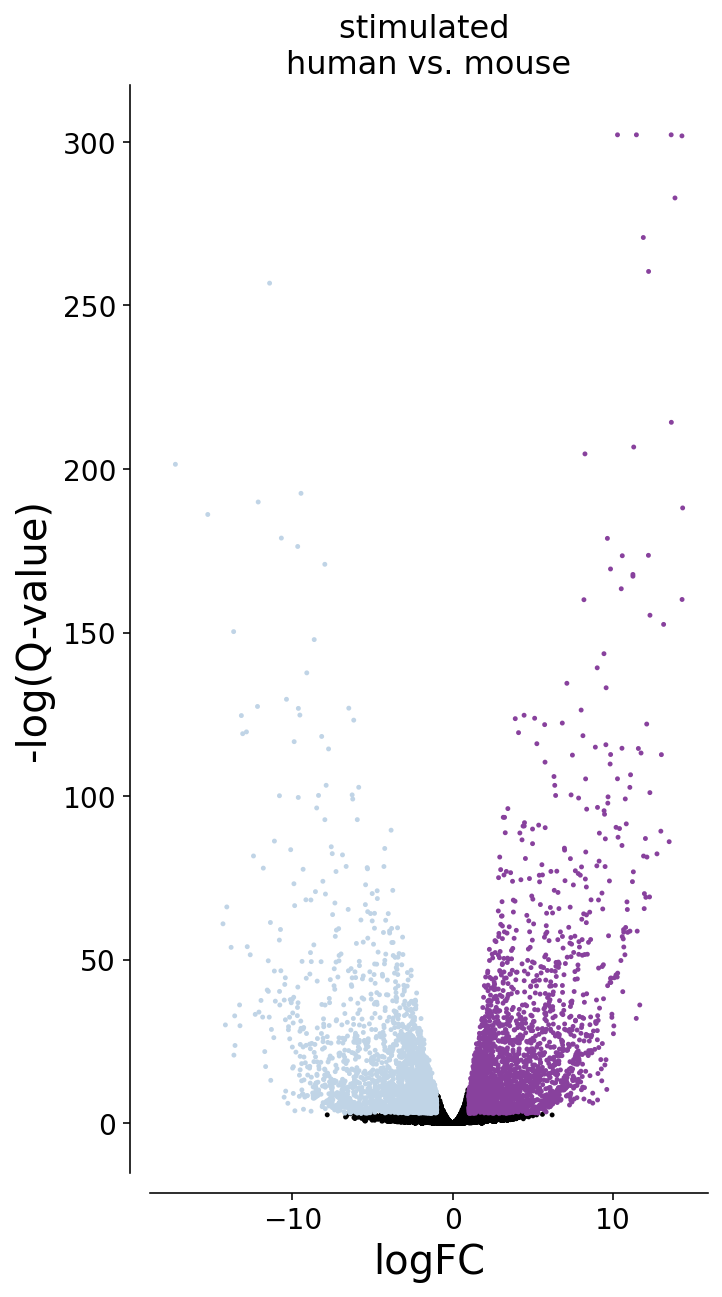

In [23]:
# plot the stim volcano 
fig=plt.figure(figsize=(5,10))
sns.scatterplot( data=df_groups ,x=stim_FC_col_name, y=stim_qval_col_name, c = df_groups['stim_color'],s=6, edgecolor='none')
sns.despine(offset=10, trim=False,fig=fig)

plt.tick_params(axis='both',which ='major',labelsize=14)
plt.xlabel('logFC',fontsize=20)
plt.ylabel('-log(Q-value)',fontsize=20)

plt.title('stimulated \nhuman vs. mouse',fontsize=16,loc='center')
#plt.ylim(-2,30)
#plt.ylim(-2,30)
plt.savefig(r'figures\volcano_plots\stimulated_dsRNA_human_vs_mouse_no_filter.pdf')
plt.savefig(r'figures\volcano_plots\stimulated_dsRNA_human_vs_mouse_no_filter.png')


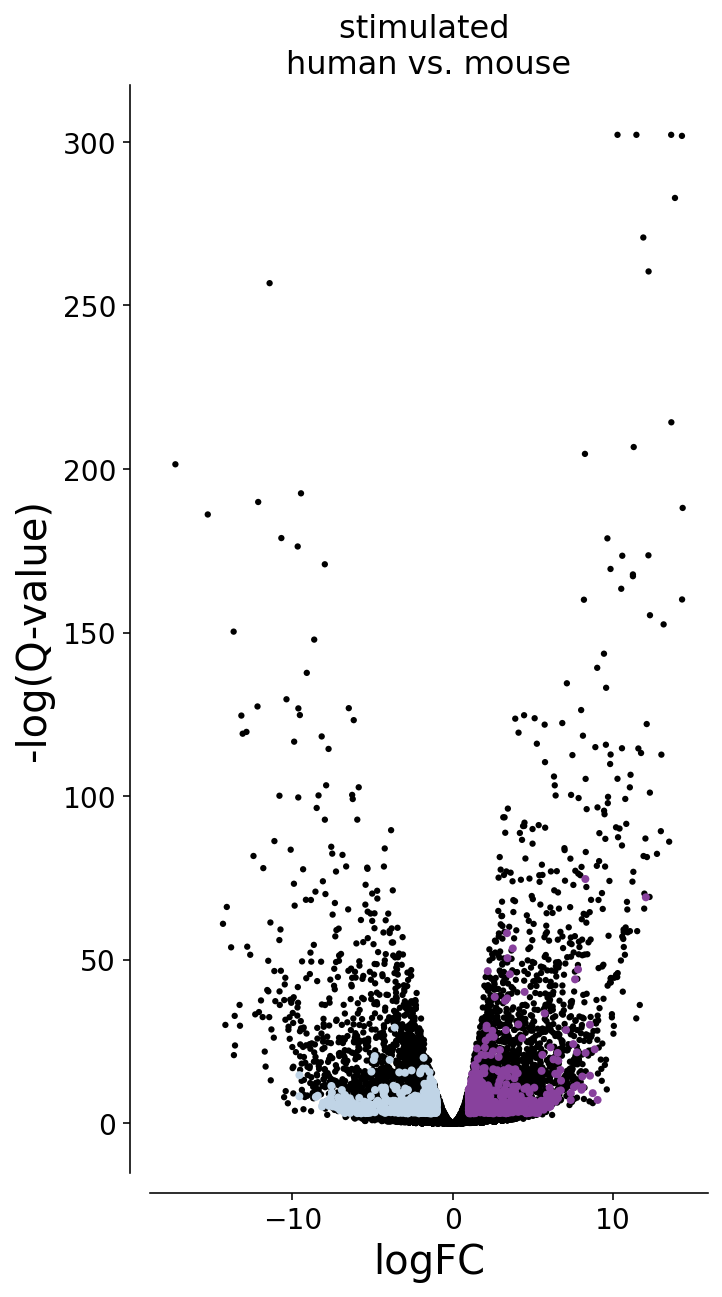

In [24]:
# plot the stim volcano 
fig=plt.figure(figsize=(5,10))
sns.scatterplot( data=df_groups ,x=stim_FC_col_name, y=stim_qval_col_name, c = df_groups['stim_groups_color'],s=df_groups['stim_groups_size'], edgecolor='none')
sns.despine(offset=10, trim=False,fig=fig)

plt.tick_params(axis='both',which ='major',labelsize=14)
plt.xlabel('logFC',fontsize=20)
plt.ylabel('-log(Q-value)',fontsize=20)

plt.title('stimulated \nhuman vs. mouse',fontsize=16,loc='center')
#plt.ylim(-2,30)

#plt.ylim(-2,30)
plt.savefig(r'figures\volcano_plots\stimulated_dsRNA_human_vs_mouse_filter.pdf')
plt.savefig(r'figures\volcano_plots\stimulated_dsRNA_human_vs_mouse_filter.png')


In [25]:
df_groups.sort_values(by='group_LF4',ascending=True,inplace=True)

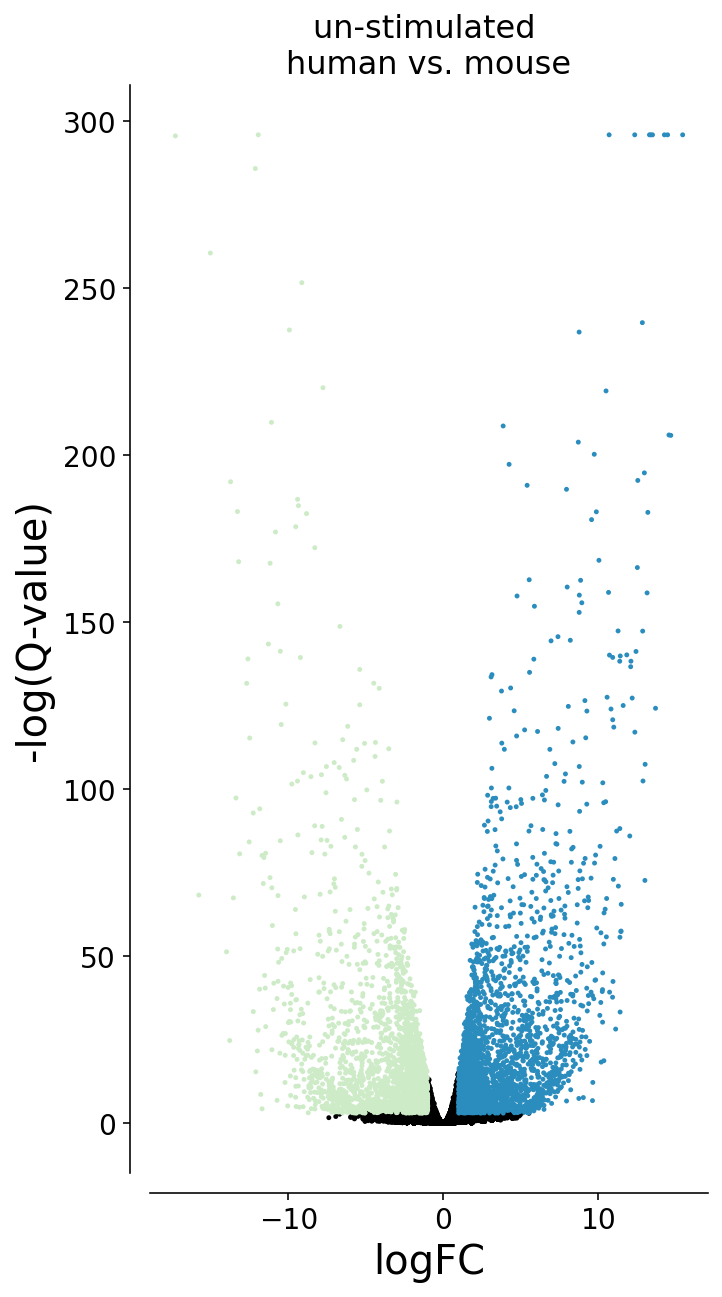

In [26]:
# plot the unstim volcano 

fig=plt.figure(figsize=(5,10))
sns.scatterplot( data=df_groups ,x=unst_FC_col_name, y=unst_qval_col_name, c = df_groups['unst_color'],s=6, edgecolor='none')
sns.despine(offset=10, trim=False,fig=fig)
#plt.ylim(-2,30)

plt.tick_params(axis='both',which ='major',labelsize=14)
plt.xlabel('logFC',fontsize=20)
plt.ylabel('-log(Q-value)',fontsize=20)

plt.title('un-stimulated \nhuman vs. mouse',fontsize=16,loc='center')
#plt.ylim(-2,30)
plt.savefig(r'figures\volcano_plots\unstimulated_control_human_vs_mouse_no_filter.pdf')
plt.savefig(r'figures\volcano_plots\unstimulated_control_human_vs_mouse_no_filter.png')


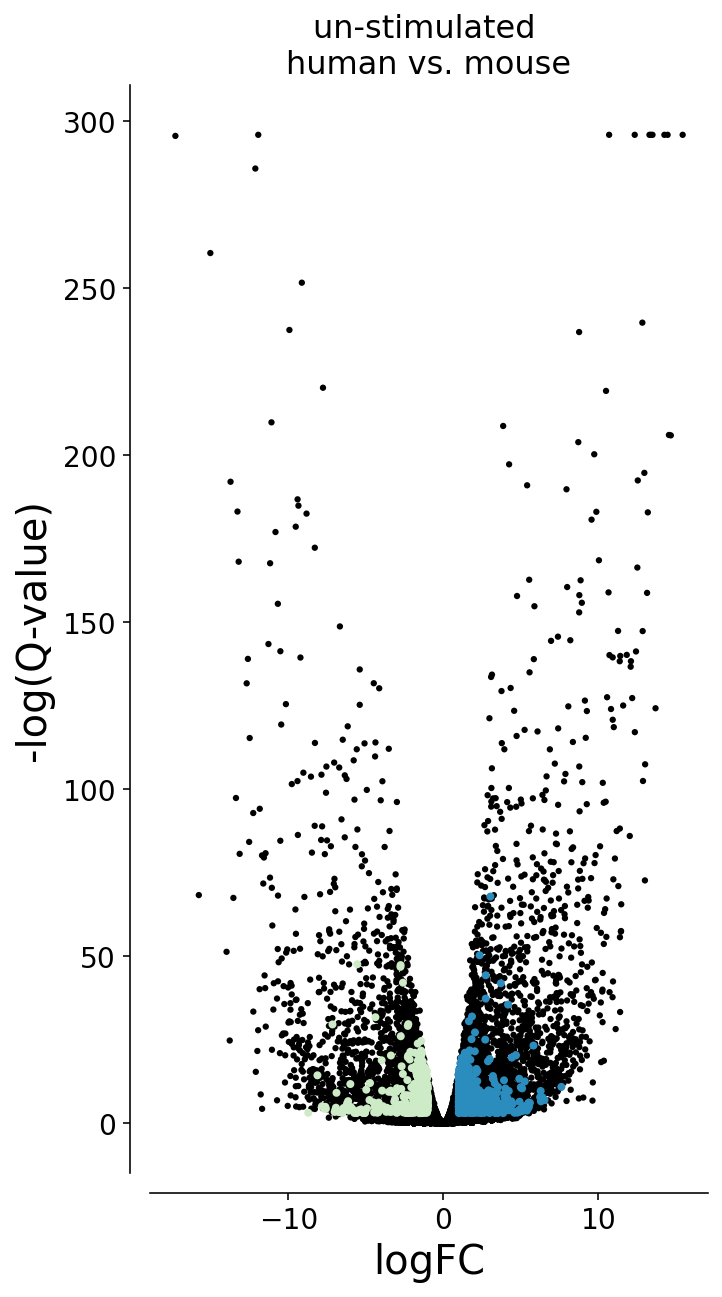

In [27]:
# plot the unstim volcano 

fig=plt.figure(figsize=(5,10))
sns.scatterplot( data=df_groups ,x=unst_FC_col_name, y=unst_qval_col_name, c = df_groups['unst_groups_color'],s=df_groups['unst_groups_size'], edgecolor='none')
sns.despine(offset=10, trim=False,fig=fig)
plt.tick_params(axis='both',which ='major',labelsize=14)
plt.xlabel('logFC',fontsize=20)
plt.ylabel('-log(Q-value)',fontsize=20)

plt.title('un-stimulated \nhuman vs. mouse',fontsize=16,loc='center')
#plt.ylim(-2,30)
plt.savefig(r'figures\volcano_plots\unstimulated_control_human_vs_mouse_filter.pdf')
plt.savefig(r'figures\volcano_plots\unstimulated_control_human_vs_mouse_filter.png')


In [28]:
print(list(sns.color_palette('Blues',n_colors=8)))




[(0.8825067281814687, 0.929196462898885, 0.9724413687043445), (0.7993540945790081, 0.8740792003075739, 0.944882737408689), (0.6718954248366014, 0.8143790849673203, 0.9006535947712418), (0.5105882352941177, 0.7323029603998462, 0.8588389081122645), (0.34646674356016915, 0.632402921953095, 0.8106728181468666), (0.21568627450980393, 0.5294117647058824, 0.7542483660130719), (0.10557477893118032, 0.41262591311034214, 0.6859669357939254), (0.03137254901960784, 0.301914648212226, 0.588404459823145)]


In [29]:
pal = sns.color_palette('OrRd',n_colors=8)
print(pal.as_hex())



['#feeacc', '#fdd9a8', '#fdc38d', '#fca26d', '#f67b51', '#e7533a', '#ce2417', '#ad0000']


In [30]:
sns.color_palette('OrRd',n_colors=3)


[(0.9921568627450981, 0.8306036139946175, 0.6188081507112649),
 (0.9874356016916571, 0.550480584390619, 0.34797385620915033),
 (0.8398154555940023, 0.18380622837370242, 0.11870818915801615)]

In [31]:
sns.color_palette('PuBu',n_colors=3)


[(0.8143944636678201, 0.8189926951172626, 0.9016224529027297),
 (0.4510880430603614, 0.6612072279892349, 0.8108419838523645),
 (0.019515570934256054, 0.43718569780853517, 0.6869665513264129)]

In [32]:
sns.color_palette('winter',n_colors=3)


[(0.0, 0.25098039215686274, 0.8745098039215686),
 (0.0, 0.5019607843137255, 0.7490196078431373),
 (0.0, 0.7529411764705882, 0.6235294117647059)]

In [33]:
sns.color_palette('GnBu',n_colors=3)


[(0.7988927335640139, 0.9211380238369857, 0.7720569011918493),
 (0.4795847750865052, 0.7984621299500193, 0.7695501730103806),
 (0.16539792387543253, 0.5456978085351788, 0.7434371395617071)]

In [34]:
sns.color_palette('BuGn',n_colors=3)


[(0.7984313725490196, 0.9248750480584391, 0.9010688196847366),
 (0.3977239523260285, 0.7595540176855056, 0.6403075740099962),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [35]:
sns.color_palette('bone',n_colors=3)


[(0.2196078431372549, 0.21960775720366513, 0.30554134697357205),
 (0.4392156862745098, 0.4841298686810369, 0.5642155882230956),
 (0.662224143106496, 0.7838235294117647, 0.7838234807720867)]

In [36]:
sns.color_palette('twilight',n_colors=8)


[(0.6209919306481755, 0.733369347989232, 0.7871899462469658),
 (0.40346600333905397, 0.5204784765384003, 0.7437421522356709),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.26003895187439957, 0.0722947810433622, 0.3417175669546984),
 (0.277471508091428, 0.07258296989925478, 0.2512349399594277),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.7307482075484517, 0.401868526884681, 0.3412449533046818),
 (0.8087321917008969, 0.6734621670219452, 0.5806983480557674)]

In [37]:
pal = sns.color_palette('twilight',n_colors=8)
print(pal.as_hex())


['#9ebbc9', '#6785be', '#5e43a5', '#421257', '#471340', '#8e2c50', '#ba6657', '#ceac94']


In [38]:
homo_stim='#5db96b'
homo_unst='#aadfd3'

In [39]:

print(list(sns.color_palette('OrRd',n_colors=8)))

pal = sns.color_palette('OrRd',n_colors=8)
print(pal.as_hex())
sns.color_palette('OrRd',n_colors=8)



[(0.996555171088043, 0.916955017301038, 0.8014763552479816), (0.9931103421760862, 0.8504421376393695, 0.6596539792387544), (0.9921568627450981, 0.7660130718954248, 0.5516339869281046), (0.9900192233756248, 0.6350019223375625, 0.4257285659361784), (0.965044213763937, 0.4815840061514802, 0.31869281045751635), (0.9058823529411765, 0.32679738562091504, 0.22875816993464054), (0.8088119953863898, 0.14246828143021914, 0.09201076509034986), (0.6771703191080354, 0.0, 0.0)]
['#feeacc', '#fdd9a8', '#fdc38d', '#fca26d', '#f67b51', '#e7533a', '#ce2417', '#ad0000']


[(0.996555171088043, 0.916955017301038, 0.8014763552479816),
 (0.9931103421760862, 0.8504421376393695, 0.6596539792387544),
 (0.9921568627450981, 0.7660130718954248, 0.5516339869281046),
 (0.9900192233756248, 0.6350019223375625, 0.4257285659361784),
 (0.965044213763937, 0.4815840061514802, 0.31869281045751635),
 (0.9058823529411765, 0.32679738562091504, 0.22875816993464054),
 (0.8088119953863898, 0.14246828143021914, 0.09201076509034986),
 (0.6771703191080354, 0.0, 0.0)]

In [40]:
mus_stim='#f67b51'
mus_unst='#fdc38d'
homo_stim='#5db96b'
homo_unst='#aedea7'

In [41]:
# creating the barplots for illustrating the regulatory switch 

non_expression_value=0.3
expression_value=5


def plot_the_illustate_barplot(df):
    
    df=df.melt()
    df.rename(columns={'value':'expression'},inplace=True)

    df

    fig=plt.figure(figsize=(3,6))
    ax=sns.barplot(data=df,x='variable',y='expression',color='#b2b2b2',order=['mouse-control','mouse-dsRNA','human-control','human-dsRNA'],dodge=True).set(yticklabels=[0],xticklabels=['control','dsRNA','control','dsRNA'])

    
    sns.despine(offset=10, trim=False,fig=fig)
    plt.xlabel(None)
    plt.ylabel('expression',fontsize=26)
    plt.tick_params(axis='x',labelsize =20,labelrotation =45)
    plt.tick_params(axis='y',labelsize =22)

    plt.tick_params(left=False, bottom=False)
    plt.ylim(0,5.5)



<ipython-input-41-7b1a1eb3f998>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=sns.barplot(data=df,x='variable',y='expression',color='#b2b2b2',order=['mouse-control','mouse-dsRNA','human-control','human-dsRNA'],dodge=True).set(yticklabels=[0],xticklabels=['control','dsRNA','control','dsRNA'])


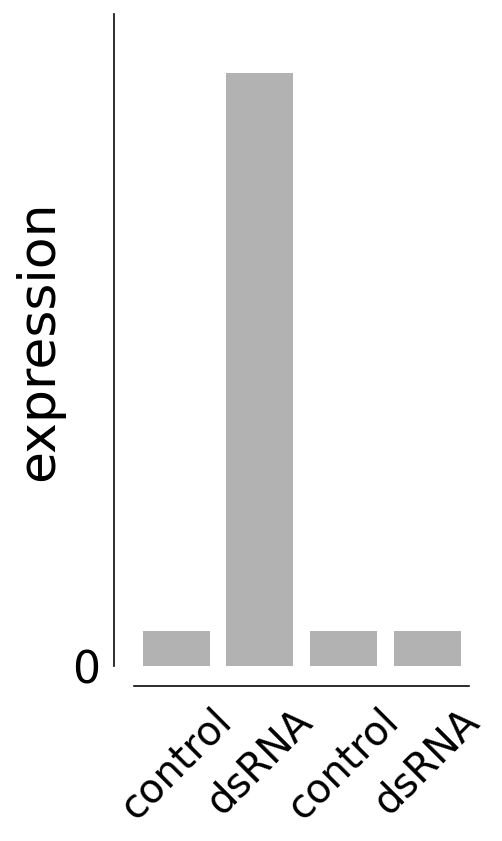

In [42]:
# PIChigh

df= pd.DataFrame(data={'mouse-control':{'expression':non_expression_value}, 'mouse-dsRNA':{'expression':expression_value},'human-control':{'expression':non_expression_value}, 'human-dsRNA':{'expression':non_expression_value}})

plot_the_illustate_barplot(df)
plt.savefig(r'figures\barplot_for_gene_pattern\stim_high_pattern.pdf')


<ipython-input-41-7b1a1eb3f998>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=sns.barplot(data=df,x='variable',y='expression',color='#b2b2b2',order=['mouse-control','mouse-dsRNA','human-control','human-dsRNA'],dodge=True).set(yticklabels=[0],xticklabels=['control','dsRNA','control','dsRNA'])


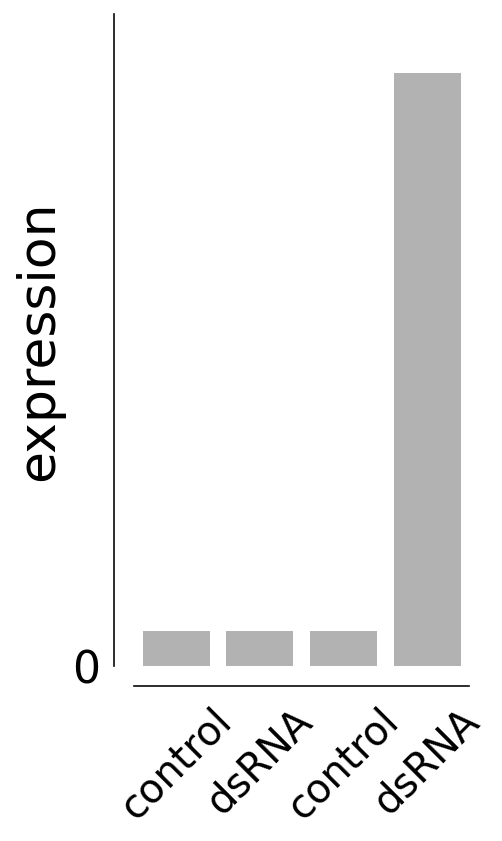

In [43]:
# PIClow

df= pd.DataFrame(data={'mouse-control':{'expression':non_expression_value}, 'mouse-dsRNA':{'expression':non_expression_value},'human-control':{'expression':non_expression_value}, 'human-dsRNA':{'expression':expression_value}})
plot_the_illustate_barplot(df)
plt.savefig(r'figures\barplot_for_gene_pattern\stim_low_pattern.pdf')


<ipython-input-41-7b1a1eb3f998>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=sns.barplot(data=df,x='variable',y='expression',color='#b2b2b2',order=['mouse-control','mouse-dsRNA','human-control','human-dsRNA'],dodge=True).set(yticklabels=[0],xticklabels=['control','dsRNA','control','dsRNA'])


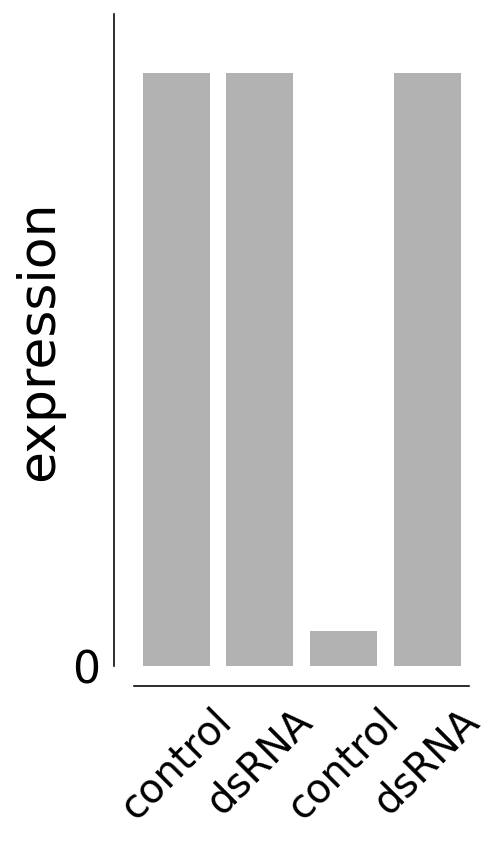

In [44]:
# LF high 

df= pd.DataFrame(data={'mouse-control':{'expression':expression_value}, 'mouse-dsRNA':{'expression':expression_value},'human-control':{'expression':non_expression_value}, 'human-dsRNA':{'expression':expression_value}})
plot_the_illustate_barplot(df)
plt.savefig(r'figures\barplot_for_gene_pattern\unst_high_pattern.pdf')


<ipython-input-41-7b1a1eb3f998>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=sns.barplot(data=df,x='variable',y='expression',color='#b2b2b2',order=['mouse-control','mouse-dsRNA','human-control','human-dsRNA'],dodge=True).set(yticklabels=[0],xticklabels=['control','dsRNA','control','dsRNA'])


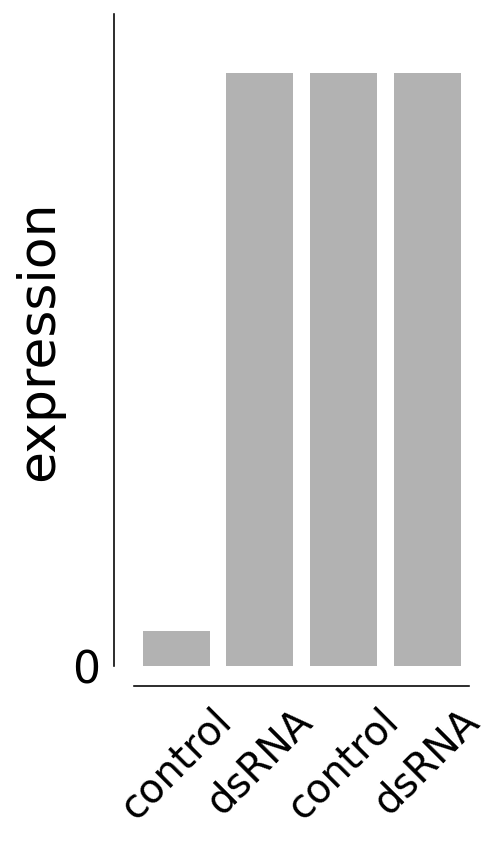

In [45]:
# LF low

df= pd.DataFrame(data={'mouse-control':{'expression':non_expression_value}, 'mouse-dsRNA':{'expression':expression_value},'human-control':{'expression':expression_value}, 'human-dsRNA':{'expression':expression_value}})
plot_the_illustate_barplot(df)
plt.savefig(r'figures\barplot_for_gene_pattern\unst_low_pattern.pdf')


# illustrated volcano 

## just an example 

In [46]:

study='Hagai'
species=['homo','mus']
if species==['homo','mus']:
    species_full_names=['Homo sapiens','Mus musculus']
    
    
if study=='Hagai':
    treats=['LF4','PIC4']
    stim_FC_col_name=f'logFC_{treats[1]}'
    stim_qval_col_name=f'minuslog_Q_val_col_{treats[1]}'
    unst_FC_col_name=f'logFC_{treats[0]}'
    unst_qval_col_name=f'minuslog_Q_val_col_{treats[0]}'
    

elif study=='Ploss':
    treats=['mock','treated']
    stim_FC_col_name=f'logFC_{treats[1]}'
    stim_qval_col_name=f'minuslog_Q_val_col_{treats[1]}'
    unst_FC_col_name=f'logFC_{treats[0]}'
    unst_qval_col_name=f'minuslog_Q_val_col_{treats[0]}'
    
    

df_groups=pd.read_csv(r'input\{}_{}_vs_{}_{}_and_{}_groups_results.csv'.format(study,species[0],species[1],treats[0],treats[1]),index_col=0)
df_groups

,logFC_LF4,minuslog_Q_val_col_LF4,group_LF4,group_PIC4,logFC_PIC4,minuslog_Q_val_col_PIC4
ENSG00000259417,15.441913,295.855509,---,---,13.848277,282.853586
ENSG00000034510,-11.932035,295.855509,---,---,-11.416728,256.804062
ENSG00000162692,12.350022,295.855509,---,---,8.956055,37.662805
ENSG00000073737,13.496145,295.855509,---,---,12.203358,260.385220
ENSG00000166426,14.263694,295.855509,---,---,14.281898,301.829724
...,...,...,...,...,...,...
ENSG00000204060,-0.310880,-0.000000,---,---,-0.776482,0.151160
ENSG00000144230,-0.008400,-0.000000,---,---,1.800975,0.134591
ENSG00000168329,-0.475567,-0.000000,---,---,1.533496,0.533617
ENSG00000170128,0.000000,-0.000000,---,---,1.120675,0.322216


In [47]:
for i in df_groups.index: 
    if df_groups.at[i,'group_PIC4'].startswith('PIC4_high') :
        df_groups.at[i,'minuslog_Q_val_col_PIC4']=df_groups.at[i,'minuslog_Q_val_col_PIC4']+7.5
        df_groups.at[i,'logFC_PIC4']=df_groups.at[i,'logFC_PIC4']+1.8
        
    elif df_groups.at[i,'group_PIC4'].startswith('PIC4_low') :
        df_groups.at[i,'minuslog_Q_val_col_PIC4']=df_groups.at[i,'minuslog_Q_val_col_PIC4']+7.5
        df_groups.at[i,'logFC_PIC4']=df_groups.at[i,'logFC_PIC4']-1.8
        
        


In [48]:
df_groups[df_groups['group_PIC4'].str.startswith('PIC4_high')]['logFC_PIC4']=df_groups[df_groups['group_PIC4'].str.startswith('PIC4_high')]['logFC_PIC4'].add(7)

<ipython-input-48-cda0d6e4cef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups[df_groups['group_PIC4'].str.startswith('PIC4_high')]['logFC_PIC4']=df_groups[df_groups['group_PIC4'].str.startswith('PIC4_high')]['logFC_PIC4'].add(7)


In [49]:
df_groups['unst_color']='black'
df_groups['stim_color']='black'

df_groups['unst_groups_color']='black'
df_groups['stim_groups_color']='black'


#df_groups['unst_groups_size']=10
#df_groups['stim_groups_size']=10


In [50]:
df_groups.unst_color[(df_groups['logFC_LF4']<=-3) & (df_groups['minuslog_Q_val_col_LF4']>=10)]='#2F5597'
df_groups.unst_color[(df_groups['logFC_LF4']>=3) & (df_groups['minuslog_Q_val_col_LF4']>=10)]='#C55A11'

df_groups.stim_color[(df_groups['logFC_PIC4']<=-3) & (df_groups['minuslog_Q_val_col_PIC4']>=10)]='#2F5597'
df_groups.stim_color[(df_groups['logFC_PIC4']>=3) & (df_groups['minuslog_Q_val_col_PIC4']>=10)]='#C55A11'

df_groups


<ipython-input-50-b7413d4006f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.unst_color[(df_groups['logFC_LF4']<=-3) & (df_groups['minuslog_Q_val_col_LF4']>=10)]='#2F5597'
<ipython-input-50-b7413d4006f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.unst_color[(df_groups['logFC_LF4']>=3) & (df_groups['minuslog_Q_val_col_LF4']>=10)]='#C55A11'
<ipython-input-50-b7413d4006f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,logFC_LF4,minuslog_Q_val_col_LF4,group_LF4,group_PIC4,logFC_PIC4,minuslog_Q_val_col_PIC4,unst_color,stim_color,unst_groups_color,stim_groups_color
ENSG00000259417,15.441913,295.855509,---,---,13.848277,282.853586,#C55A11,#C55A11,black,black
ENSG00000034510,-11.932035,295.855509,---,---,-11.416728,256.804062,#2F5597,#2F5597,black,black
ENSG00000162692,12.350022,295.855509,---,---,8.956055,37.662805,#C55A11,#C55A11,black,black
ENSG00000073737,13.496145,295.855509,---,---,12.203358,260.385220,#C55A11,#C55A11,black,black
ENSG00000166426,14.263694,295.855509,---,---,14.281898,301.829724,#C55A11,#C55A11,black,black
...,...,...,...,...,...,...,...,...,...,...
ENSG00000204060,-0.310880,-0.000000,---,---,-0.776482,0.151160,black,black,black,black
ENSG00000144230,-0.008400,-0.000000,---,---,1.800975,0.134591,black,black,black,black
ENSG00000168329,-0.475567,-0.000000,---,---,1.533496,0.533617,black,black,black,black
ENSG00000170128,0.000000,-0.000000,---,---,1.120675,0.322216,black,black,black,black


In [51]:
#df_groups.unst_groups_color[df_groups['group_LF4'].str.startswith('LF4_high')]=unst_high_col
#df_groups.unst_groups_color[df_groups['group_LF4'].str.startswith('LF4_low')]=unst_low_col

df_groups.stim_groups_color[df_groups['group_PIC4'].str.startswith('PIC4_high')]='#C55A11'
df_groups.stim_groups_color[df_groups['group_PIC4'].str.startswith('PIC4_low')]='#2F5597'
#

<ipython-input-51-699a10f64dc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.stim_groups_color[df_groups['group_PIC4'].str.startswith('PIC4_high')]='#C55A11'
<ipython-input-51-699a10f64dc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups.stim_groups_color[df_groups['group_PIC4'].str.startswith('PIC4_low')]='#2F5597'


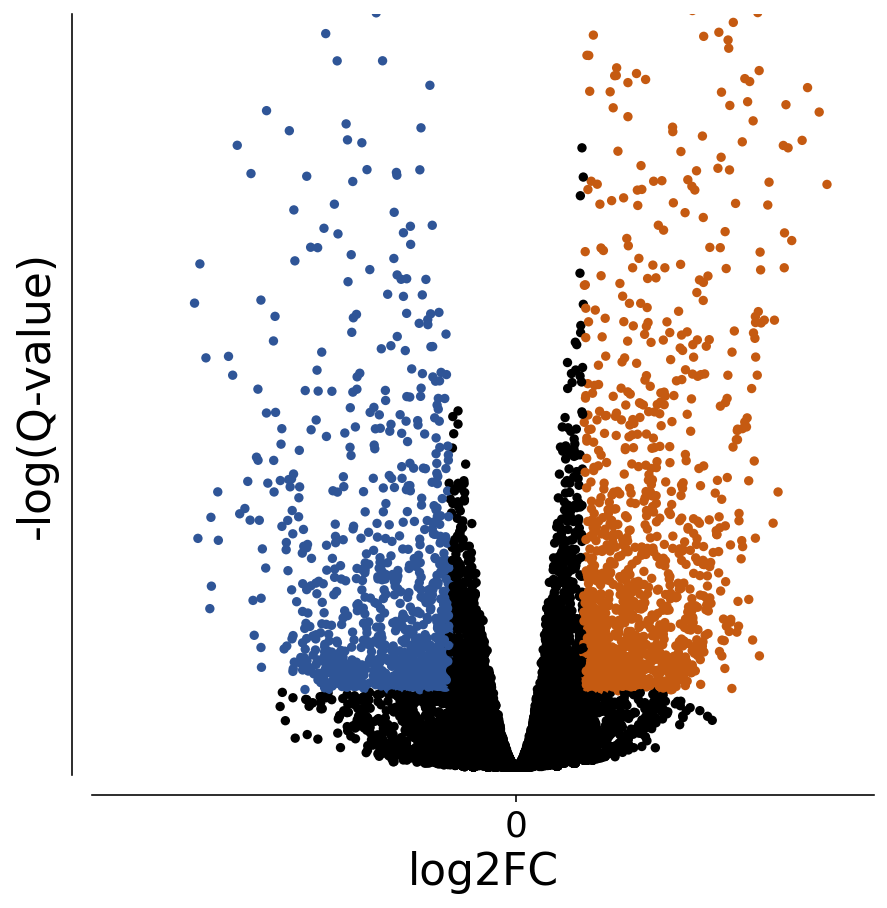

In [52]:
# plot the stim volcano 
fig=plt.figure(figsize=(7,7))
sns.scatterplot( data=df_groups ,x=stim_FC_col_name, y=stim_qval_col_name,s=22,c=df_groups['stim_color'] ,edgecolor='none')
sns.despine(offset=10, trim=False,fig=fig)

plt.tick_params(axis='both',which ='major',labelsize=18)
plt.yticks([])
plt.xticks([0])

plt.xlabel('log2FC',fontsize=22)
plt.ylabel('-log(Q-value)',fontsize=22)
plt.ylim(-1, 99)

#plt.title('stimulated \nhuman vs. mouse',fontsize=16,loc='center')
plt.savefig(r'figures\illustrated_volcano\illustrated_no_filt.pdf')


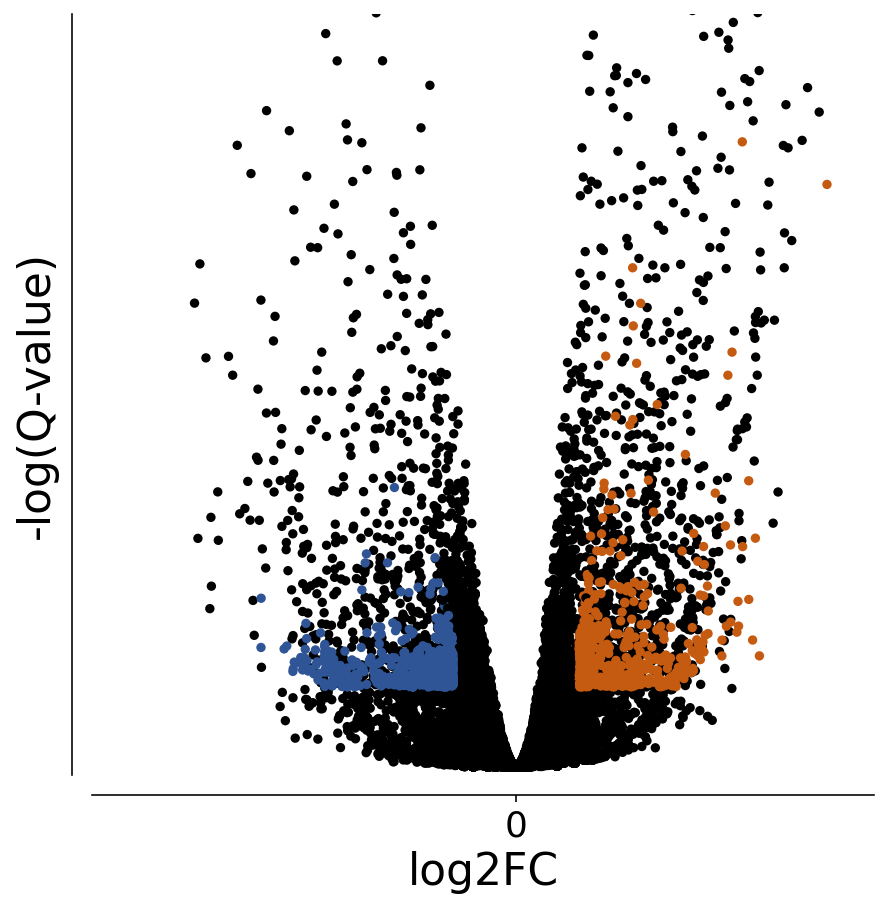

In [53]:
# plot the stim volcano - only groups
fig=plt.figure(figsize=(7,7))
sns.scatterplot( data=df_groups ,x=stim_FC_col_name, y=stim_qval_col_name,s=22,c=df_groups['stim_groups_color'] ,edgecolor='none')
sns.despine(offset=10, trim=False,fig=fig)

plt.tick_params(axis='both',which ='major',labelsize=18)
plt.yticks([])
plt.xticks([0])

plt.xlabel('log2FC',fontsize=22)
plt.ylabel('-log(Q-value)',fontsize=22)
plt.ylim(-1, 99)

#plt.title('stimulated \nhuman vs. mouse',fontsize=16,loc='center')
plt.savefig(r'figures\illustrated_volcano\illustrated_filt.pdf')
